<h2><b>Importing packages</b></h2>

In [1]:
import os
import json 
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from datetime import datetime

<h2><b>Data Preprocessing</b></h2>

In [3]:
# Define directories and hyperparameters
train_dir =r'D:\testproject\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'
val_dir = r'D:\testproject\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid'
test_dir=r'D:\testproject\New Plant Diseases Dataset(Augmented)\test\test'
img_size = (299, 299) 
batch_size = 16
epochs =8
patience = 5


In [2]:
train_dir = 'C:/Users/91799/Desktop/PROJECT_DATASET/New_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
val_dir = 'C:/Users/91799/Desktop/PROJECT_DATASET/New_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = 'C:/Users/91799/Desktop/PROJECT_DATASET/New_dataset/test/images test'
img_size = (299, 299) 
batch_size = 16
epochs =8
patience = 5

(256, 256, 3)


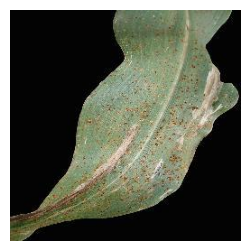

In [3]:
image_path = 'C:/Users/91799/Desktop/PROJECT_DATASET/New_dataset/CornCommonRust1.JPG'

# Read the image
img = plt.imread(image_path)

print(img.shape)
plt.figure(figsize=(3,3))
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [4]:
image_path = 'C:/Users/91799/Desktop/PROJECT_DATASET/New_dataset/CornCommonRust1.JPG'

# Read the image
img = plt.imread(image_path)

print(img)

[[[  3   3   3]
  [  3   3   3]
  [  3   3   3]
  ...
  [  4   3   1]
  [  6   2   1]
  [  6   2   0]]

 [[  3   3   3]
  [  3   3   3]
  [  3   3   3]
  ...
  [  4   3   1]
  [  6   2   1]
  [  6   2   0]]

 [[  3   3   3]
  [  3   3   3]
  [  3   3   3]
  ...
  [  4   3   1]
  [  4   3   1]
  [  4   3   0]]

 ...

 [[ 72  67  27]
  [ 80  77  36]
  [ 83  81  40]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[ 91  83  46]
  [ 93  88  48]
  [ 89  86  45]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[ 86  78  41]
  [ 95  90  52]
  [101  96  56]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]]


<h2><b>Splitting the data</b></h2>

In [4]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input 
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 12750 images belonging to 17 classes.
Found 7809 images belonging to 17 classes.
Found 468 images belonging to 17 classes.


<h2><b>Building the ResNet50 Model</b></h2>

In [6]:
base_model = ResNet50(weights='imagenet', include_top=False)

In [7]:
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<h2><b>Model Training</b></h2>

In [9]:
base_model_name = base_model.name

# Get the current date and time
current_date = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")

# Define the file name using the model name and current date
file_name = f"models/{base_model_name}_plant_disease_detection[{current_date}].h5"

# Check if the file already exists
if os.path.exists(file_name):
    # Prompt the user to enter a new name
    print(file_name," already exits!!")
    new_name = input("A file with the same name already exists. Please enter a new name: ")
    file_name = f"models/{new_name}.h5"
print("New file name : ",file_name)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
callbacks = [early_stopping]

New file name :  models/resnet50_plant_disease_detection[11-04-2024_19-43-19].h5


In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=callbacks
)

Epoch 1/8


796/796 [==============================] - 3048s 4s/step - loss: 0.3048 - accuracy: 0.9035 - val_loss: 0.2792 - val_accuracy: 0.9159
Epoch 2/8
796/796 [==============================] - 3022s 4s/step - loss: 0.1282 - accuracy: 0.9542 - val_loss: 0.1378 - val_accuracy: 0.9574
Epoch 3/8
796/796 [==============================] - 3361s 4s/step - loss: 0.1151 - accuracy: 0.9587 - val_loss: 0.1215 - val_accuracy: 0.9612
Epoch 4/8
796/796 [==============================] - 3297s 4s/step - loss: 0.0943 - accuracy: 0.9660 - val_loss: 0.1865 - val_accuracy: 0.9499
Epoch 5/8
796/796 [==============================] - 36570s 46s/step - loss: 0.0908 - accuracy: 0.9686 - val_loss: 0.1108 - val_accuracy: 0.9696
Epoch 6/8
796/796 [==============================] - 3028s 4s/step - loss: 0.0766 - accuracy: 0.9732 - val_loss: 0.1360 - val_accuracy: 0.9656
Epoch 7/8
796/796 [==============================] - 3987s 5s/step - loss: 0.0699 - accuracy: 0.9761 - val_loss: 0.1377 - val_accuracy: 0.

In [11]:
# Save history object
import pickle
with open('history[resnet_history].pkl', 'wb') as f:
     pickle.dump(history.history, f)

In [12]:
with open('history[resnet_history].pkl', 'rb') as f:
    loaded_history = pickle.load(f)

In [13]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [14]:
# Save class indices to a JSON file
with open('class_indices_resnet50.json', 'w') as f:
    json.dump(class_indices, f)

In [15]:
# Load class indices
with open('class_indices_resnet50.json', 'r') as f:
    class_indices = json.load(f)

<h2><b>Evaluation of Model</b></h2>

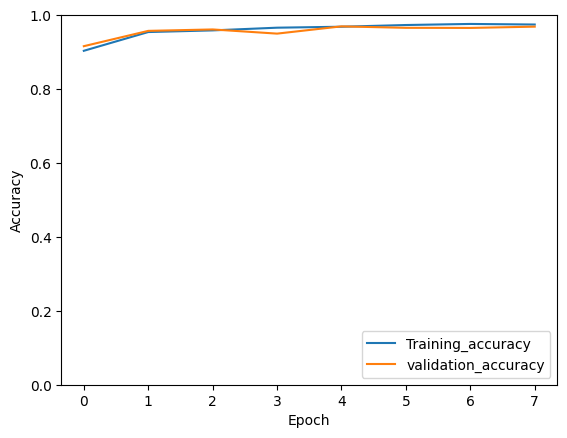

In [16]:
plt.plot(history.history['accuracy'], label='Training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

22/22 [==============================] - 65s 2s/step
There were 329 errors in 338 tests for an accuracy of 2.66


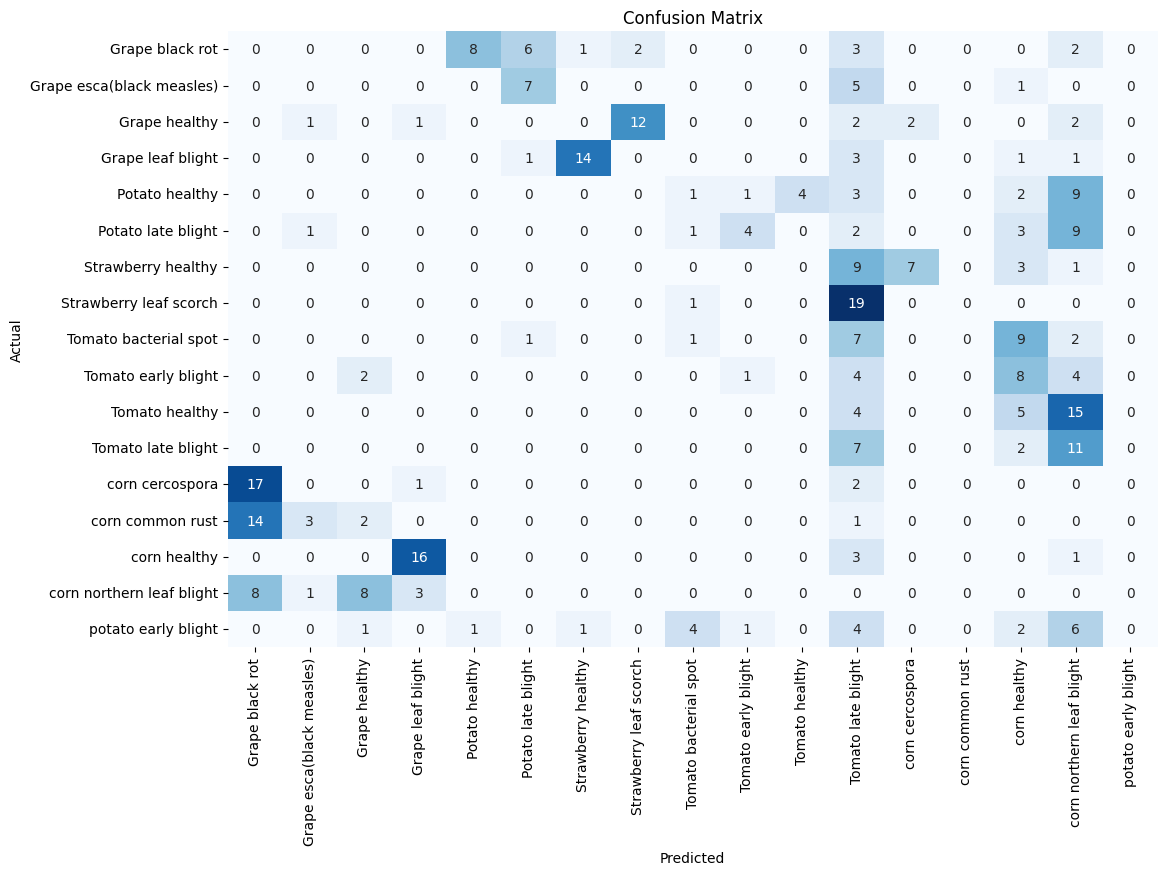

Classification Report:/n----------------------/n                            precision    recall  f1-score   support

          Grape black rot     0.0000    0.0000    0.0000        22
Grape esca(black measles)     0.0000    0.0000    0.0000        13
            Grape healthy     0.0000    0.0000    0.0000        20
        Grape leaf blight     0.0000    0.0000    0.0000        20
           Potato healthy     0.0000    0.0000    0.0000        20
       Potato late blight     0.0000    0.0000    0.0000        20
       Strawberry healthy     0.0000    0.0000    0.0000        20
   Strawberry leaf scorch     0.0000    0.0000    0.0000        20
    Tomato bacterial spot     0.1250    0.0500    0.0714        20
      Tomato early blight     0.1429    0.0526    0.0769        19
           Tomato healthy     0.0000    0.0000    0.0000        24
       Tomato late blight     0.0897    0.3500    0.1429        20
          corn cercospora     0.0000    0.0000    0.0000        20
         cor

C:\Users\91799\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91799\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91799\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [17]:
def predictor(test_gen):    
    y_pred = []
    error_list = []
    error_pred_list = []
    y_true = test_gen.labels
    classes = list(test_gen.class_indices.keys())
    class_count = len(classes)
    errors = 0
    preds = model.predict(test_gen, verbose=1)
    tests = len(preds)    
    for i, p in enumerate(preds):        
        pred_index = np.argmax(p)         
        true_index = test_gen.labels[i]  # labels are integer values        
        if pred_index != true_index: # a misclassification has occurred                                           
            errors = errors + 1
            file = test_gen.filenames[i]
            error_list.append(file)
            error_class = classes[pred_index]
            error_pred_list.append(error_class)
        y_pred.append(pred_index)
            
    acc = (1 - errors/tests) * 100
    msg = f'There were {errors} errors in {tests} tests for an accuracy of {acc:.2f}'
    print(msg)
    
    ypred = np.array(y_pred)
    ytrue = np.array(y_true)
    f1score = f1_score(ytrue, ypred, average='weighted') * 100
    if class_count <= 30:
        cm = confusion_matrix(ytrue, ypred)
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count) + .5, classes, rotation=90)
        plt.yticks(np.arange(class_count) + .5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    
    clr = classification_report(y_true, y_pred, target_names=classes, digits=4) # create classification report
    print("Classification Report:/n----------------------/n", clr)
    
    return errors, tests, error_list, error_pred_list, f1score, y_pred, y_true

errors, tests, error_list, error_pred_list, f1score, y_pred, y_true = predictor(test_generator)      
        


In [18]:
from sklearn.metrics import classification_report

# Predict classes for test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report:/n", report)

22/22 [==============================] - 49s 2s/step
Classification Report:/n                            precision    recall  f1-score   support

          Grape black rot       0.00      0.00      0.00        22
Grape esca(black measles)       0.00      0.00      0.00        13
            Grape healthy       0.00      0.00      0.00        20
        Grape leaf blight       0.00      0.00      0.00        20
           Potato healthy       0.00      0.00      0.00        20
       Potato late blight       0.00      0.00      0.00        20
       Strawberry healthy       0.00      0.00      0.00        20
   Strawberry leaf scorch       0.00      0.00      0.00        20
    Tomato bacterial spot       0.12      0.05      0.07        20
      Tomato early blight       0.14      0.05      0.08        19
           Tomato healthy       0.00      0.00      0.00        24
       Tomato late blight       0.09      0.35      0.14        20
          corn cercospora       0.00      0.00    

C:\Users\91799\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91799\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91799\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [19]:
# Evaluate the model on test generator
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

22/22 [==============================] - 48s 2s/step - loss: 19.4445 - accuracy: 0.0266
Test Accuracy: 0.02662721835076809
Test Loss: 19.44451332092285


In [20]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Save class indices to a JSON file
with open('class_indices_resnet50.json', 'w') as f:
    json.dump(class_indices, f)

<h2><b>Prediction of Disease</b></h2>

In [21]:
# Function to predict disease from an image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def predict_disease(image_path):

    img = load_img(image_path, target_size=(img_size))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)[0]
    predicted_class_index = np.argmax(prediction)
    disease = class_indices[str(predicted_class_index)]
    confidence = prediction[predicted_class_index]

    return disease, confidence 

In [22]:
# Load class indices
with open('class_indices_resnet50.json', 'r') as f:
    class_indices = json.load(f)

In [23]:
image_path = r'C:/Users/91799/Desktop/PROJECT_DATASET/New_dataset/CornCommonRust3.JPG' 

disease, confidence = predict_disease(image_path)

print(f'Predicted Disease: {disease}, Confidence: {confidence}')

1/1 [==============================] - 2s 2s/step
Predicted Disease: Corn_(maize)___Common_rust_, Confidence: 1.0


In [1]:
# Save the model
model.save('plant_disease_detection_models_resnet[11-04-24].h5')

NameError: name 'model' is not defined